#  Практическое задание №1 по ОММ                                   
### Адонин Артем Сергеевич 303 группа
## Задача № 12

# 1. Постановка задачи

Используя схему бегущего счёта и итерационные методы, решить задачу:


\begin{equation}
\begin{cases}
\frac{\partial u}{\partial t} - \frac{2e^{2u}}{1+e^{2u}} \cdot \frac{\partial u}{\partial x} = 0, \; -1\leq x< 0, \\
u(x, 0) = sinπx, \\
u(0, t) = 0.
\end{cases}
\end{equation}

#  2. Анализ задачи
## 1)Построение характеристик

Cоставим уравнения характеристик и посмотрим, будут ли они пересекаться:
\begin{equation}
\frac{dt}{1} = - \frac{1+e^{2u}}{2e^{2u}} \cdot \frac{dx}{1}=\frac{du}{0}
\end{equation}

Получим систему уравнения:

\begin{equation}
\begin{cases}
u=const \\
\frac{dx}{dt}=-\frac{2e^{2u}}{1+e^{2u}}.
\end{cases}
\end{equation}

Интегрируя,получим:

\begin{equation}
x - x_0 =  - (t - t_0)\frac{2e^{2u}}{1+e^{2u}}
\end{equation}

Получим семейство кривых:

   Для $t_0$ = 0 и u=sin(πx):  $t = - (x - x_0)\frac{1+e^{2sin(πx_0)}}{2e^{2sin(πx_0)}}$
   
   Для $x_0$ = 0 и u=0: $t = t_0 - x$
   

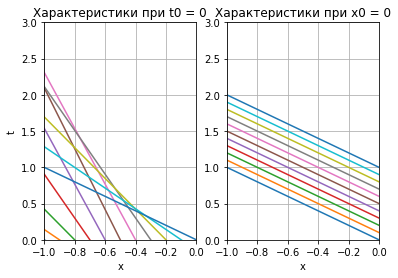

In [1]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
#  для t0 = 0
def char1(x):
    return [-(x - x0) * (1. + np.exp(2. * np.sin(np.pi * x0)))/(2. * np.exp(2. * np.sin(np.pi * x0)))  for x0 in np.arange(-1., 0.1, 0.1)]

#  для x0 = 0
def char2(x):
    return [t0 - x for t0 in np.arange(0, 1.1, 0.1)]

# Так как x принадлежит [-1; 0), создадим массив
x_arr = np.arange(-1, 0.1, 0.1)

# Передадим массив в функции, отвечающие за характеристики
char1_arr = [char1(x) for x in x_arr]
char2_arr = [char2(x) for x in x_arr]

plt.subplot(1, 2, 1)
plt.ylim(0,3)
plt.xlim(-1,0)
plt.plot(x_arr, char1_arr) 
plt.title('Характеристики при t0 = 0')
plt.ylabel('t')
plt.xlabel('x')
plt.grid(True)
plt.subplot(1, 2, 2)
plt.ylim(0,3)
plt.xlim(-1,0)
plt.plot(x_arr, char2_arr)
plt.title('Характеристики при x0 = 0')
plt.xlabel('x')
plt.grid(True) 
plt.show()

## 2)Решение при помощи численных методов
## 2.1Построение разностной схемы:
Приведем уравнение
\begin{equation}
\frac{\partial u}{\partial t} - \frac{2e^{2u}}{1+e^{2u}} \cdot \frac{\partial u}{\partial x} = 0, \; -1\leq x< 0,
\end{equation}
к виду
\begin{equation}
\frac{\partial u}{\partial t} - \frac{\partial F(u)}{\partial x} = 0, \; -1\leq x< 0,
\end{equation}
\begin{equation}
\frac{\partial u}{\partial t} - F'(u)\frac{\partial u}{\partial x} = 0, \; -1\leq x< 0,
\end{equation}
тогда 
\begin{equation}
F'(u)=-\frac{2e^{2u}}{1+e^{2u}}
\end{equation}
\begin{equation}
F(u)=-ln(e^{2u}+1)+const
\end{equation}


 Введем сетку с шагом $h$ по $x$ и шагом $\tau$ по $t$,$N$ и $M$ число узлов соответсвенно :
\begin{equation}
\omega_{h,\tau} = 
    \begin{cases}
    x_n = n \cdot h, h = \frac{-1}{N-1}, n = \overline{0, N-1}\\
    t_m = m \cdot \tau, \tau = \frac{1}{M-1}, m = \overline{0, M-1}
    \end{cases}
\end{equation}

Введем сеточные функции: $y_n^m = u(x_n, t_m)$ и $F_n^m = F(y_n^m) = -ln(e^{2y_n^m}+1)$


Для данной задачи в рассматриваемой области будем использовать четырехточечный шаблон из узлов (m,n),(m,n+1), (m+1,n+1) и (m+1,n).

## Схема бегущего счёта

Для решения задачи будем использовать схему бегущего счёта. 
Cоставим разностную схему:
\begin{equation}
\frac{y_n^{m+1} - y_n^m + y_{n+1}^{m+1} - y_{n+1}^m}{2\tau} - \frac{F_{n+1}^{m+1} - F_n^{m+1} + F_{n+1}^m - F_n^m}{2h} = 0
\end{equation}

При этом начальное и граничное условия задачи примут вид:
\begin{equation}
\begin{cases}
y_n^0 = sin(πx_n),    n = \overline{0, N-1}\\
y_0^m = 0,   m = \overline{0, M-1}
\end{cases}
\end{equation}

Окончательный вид разностной схемы таков:
\begin{equation}
\begin{cases}
F_n^m = F(y_n^m) = -ln(e^{2y_n^m}+1)\\
\frac{y_n^{m+1} - y_n^m + y_{n+1}^{m+1} - y_{n+1}^m}{2\tau} - \frac{F_{n+1}^{m+1} - F_n^{m+1} + F_{n+1}^m - F_n^m}{2h} = 0\\
y_n^0 = sin(πx_n),    n = \overline{0, N-1}\\
y_0^m = 0,   m = \overline{0, M-1}
\end{cases}
\end{equation}

Рассмотрим второе уравнение,как уравнение относительно $y_{n+1}^{m+1}$: $f(y_{n+1}^{m+1}) = 0$

Решим его итерационным методом Ньютона; запишем функцию, нуль которой необходимо найти, и её производную:
\begin{equation}
\begin{cases}
f(y_{n+1}^{m+1}) = \frac{y_n^{m+1} - y_n^m + y_{n+1}^{m+1} - y_{n+1}^m}{2\tau} - \frac{F_{n+1}^{m+1} - F_n^{m+1} + F_{n+1}^m - F_n^m}{2h}\\
f'(y_{n+1}^{m+1}) = \frac{1}{2\tau} +\frac{2e^{2y_{n+1}^{m+1}}}{1+e^{2y_{n+1}^{m+1}}}\cdot\frac{1}{2h}
\end{cases}
\end{equation}

Суть метода Ньютона заключается в итерационной последовательности $y_{n+1}^{m+1^{(s+1)}} = y_{n+1}^{m+1^{(s)}} - \frac{f(y_{n+1}^{m+1^{(s)}})}{f'(y_{n+1}^{m+1^{(s)}})}$, которая продолжается, пока не будет достигнута необходимая точность $\varepsilon$:
\begin{equation}
|y_{n+1}^{m+1^{(s+1)}} - y_{n+1}^{m+1^{(s)}}| \leq \varepsilon
\end{equation}

Text(0.5, 0, 't')

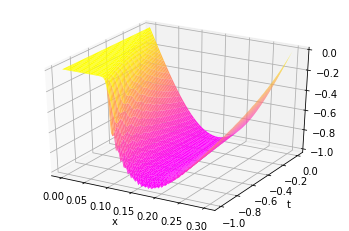

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
# составляем сетку x(N) t(M)
N = 100
M = 100
X = -1 #-1<=x<0
T =0.3
eps = 0.0001#точность


y = np.zeros((M, N), dtype=float) # матрица для сетки
h = float(X/(N-1))
τ = float (T/(M-1))

x, t = np.linspace(0, X, N), np.linspace(0, T, M) # x и t изменяется от 0 до Х

y[:, 0] = np.sin(np.pi*x)
y[0, :] = 0

def F(x):
    return (-1)*np.log(np.exp(2*x)+1) #функция F(u)

def dF(x):
    return (-1)*(2*np.exp(2*x))/(1+np.exp(2*x)) # функция F`(u)

def f(a1,a2,b1,b2):
    return (a1-b1+a2-b2)/(2*τ ) + (F(b2)-F(b1)+F(a2)-F(a1))/(2*h) #4точечный шаблон

def df(x):
    return 1/(2*τ) + dF(x)/(2*h)


# Метод Ньютона
for m in range(M-1):
    for n in range(N-1):
# вводим функции из шаблона
        u1= y[m+1,n+1]
        u12=y[m,n+1]
        u11=y[m,n]
        u21=y[m+1,n]
        d = eps+1
        while (d > eps):

            u2 = u1 - f(u12,u1,u11,u21)/df(u1)
            d = np.abs(u2-u1)
            u1 = u2
        y[m+1, n+1]=u2

def fun(x, t):
    return x
# 3D график
fig = plt.figure()
ax = fig.gca(projection='3d')
x, t = np.meshgrid(x, t)
surf = ax.plot_surface(t, x, y, cmap='spring')
ax.set_xlabel('x')
ax.set_ylabel('t')